# 1. Install Dependencies and Setup

In [5]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.17.0-cp310-cp310-macosx_12_0_arm64.whl (236.1 MB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
  Using cached matplotlib-3.9.2-cp310-cp310-macosx_11_0_arm64.whl (7.8 MB)
  Using cached tensorboard-2.17.1-py3-none-any.whl (5.5 MB)
  Using cached h5py-3.12.1-cp310-cp310-macosx_11_0_arm64.whl (2.9 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
  Using cached protobuf-4.25.5-cp37-abi3-macosx_10_9_universal2.whl (394 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached grpcio-1.66.2-cp310-cp310-macosx_12_0_universal2.whl (10.7 MB)
  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached ml_dtypes-0.4.1-cp310-cp310-macosx_10_9_universal2.whl (397 kB)

In [6]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
appnope                      0.1.4
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.8.30
charset-normalizer           3.3.2
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.6
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.1.0
flatbuffers                  24.3.25
fonttools                    4.54.1
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.66.2
h5py                         3.12.1
idna                         3.10
ipykernel                    6.29.5
ipython                      8.28.0
jedi                         0.19.1
jupyter_client               8.6.3
jupyter_core                 5.7.2
keras                        3.6.0


In [28]:
import tensorflow as tf
import os

In [8]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [9]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [29]:
import cv2
import imghdr

In [30]:
data_dir = 'data' 

In [31]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [33]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    
    # Skip if not a directory (e.g., .DS_Store or other non-directory files)
    if not os.path.isdir(class_path):
        continue
    
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)  # Detect image type
            
            # Remove file if not a valid image extension
            if tip not in image_exts:
                print(f'Image not in ext list: {image_path}')
                os.remove(image_path)
        
        except Exception as e:
            print(f'Issue with image: {image_path}, Error: {e}')
            # Optionally remove the problematic image file
            # os.remove(image_path)

# 3. Load Data

In [34]:
import numpy as np
from matplotlib import pyplot as plt

In [35]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [36]:
data_iterator = data.as_numpy_iterator()

In [37]:
batch = data_iterator.next()

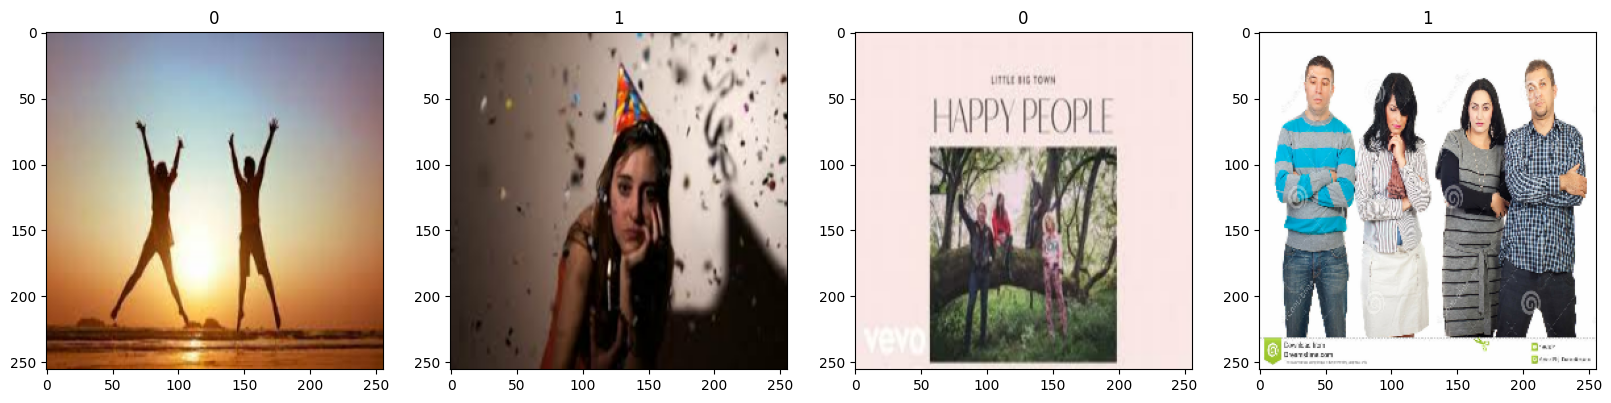

In [38]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [39]:
data = data.map(lambda x,y: (x/255, y))

In [40]:
data.as_numpy_iterator().next()

(array([[[[0.29411766, 0.3137255 , 0.2901961 ],
          [0.29479167, 0.3143995 , 0.2908701 ],
          [0.2978554 , 0.31746325, 0.2939338 ],
          ...,
          [0.35667893, 0.34491423, 0.3096201 ],
          [0.3536152 , 0.3418505 , 0.30655637],
          [0.3529412 , 0.34117648, 0.30588236]],
 
         [[0.29479167, 0.3137255 , 0.28985906],
          [0.2954367 , 0.31437054, 0.29050413],
          [0.2983688 , 0.3173026 , 0.2934362 ],
          ...,
          [0.3556521 , 0.3444166 , 0.30894607],
          [0.35232508, 0.34148452, 0.30588236],
          [0.35159314, 0.34083948, 0.30520833]],
 
         [[0.2978554 , 0.3137255 , 0.28832722],
          [0.2983688 , 0.3142389 , 0.28884062],
          [0.3007025 , 0.3165726 , 0.29117432],
          ...,
          [0.3509847 , 0.3421547 , 0.30588236],
          [0.3464609 , 0.339821  , 0.30281863],
          [0.3454657 , 0.3393076 , 0.30214462]],
 
         ...,
 
         [[0.19289216, 0.1889706 , 0.16936274],
          [0.19289

# 5. Split Data

In [41]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [42]:
train_size

7

In [43]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [44]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [46]:
model = Sequential()

In [47]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [48]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [50]:
logdir='logs'

In [51]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [52]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 337ms/step - accuracy: 0.5664 - loss: 0.6953 - val_accuracy: 0.6250 - val_loss: 0.6341
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 376ms/step - accuracy: 0.6818 - loss: 0.5953 - val_accuracy: 0.6875 - val_loss: 0.5834
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 328ms/step - accuracy: 0.7604 - loss: 0.5580 - val_accuracy: 0.8125 - val_loss: 0.4525
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 327ms/step - accuracy: 0.8369 - loss: 0.4493 - val_accuracy: 0.7656 - val_loss: 0.4387
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 0.7549 - loss: 0.4368 - val_accuracy: 0.8125 - val_loss: 0.3752
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 332ms/step - accuracy: 0.8374 - loss: 0.3472 - val_accuracy: 0.8906 - val_loss: 0.2768
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - accuracy: 0.8900 - loss: 0.2663 - val_accuracy: 0.8906 - val_loss: 0.2587
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 0.9235 - loss: 0.2100 - val_accuracy: 0.9375 - val_loss:

# 8. Plot Performance

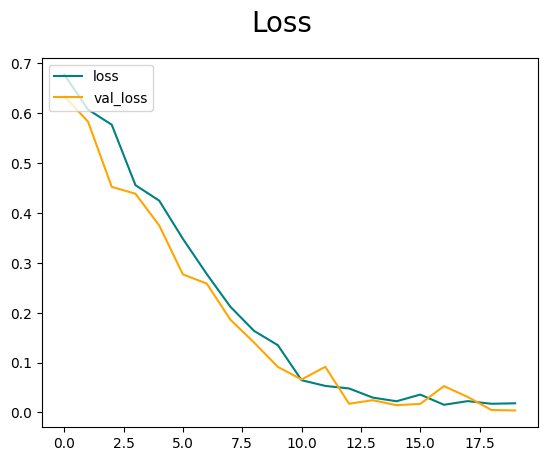

In [53]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

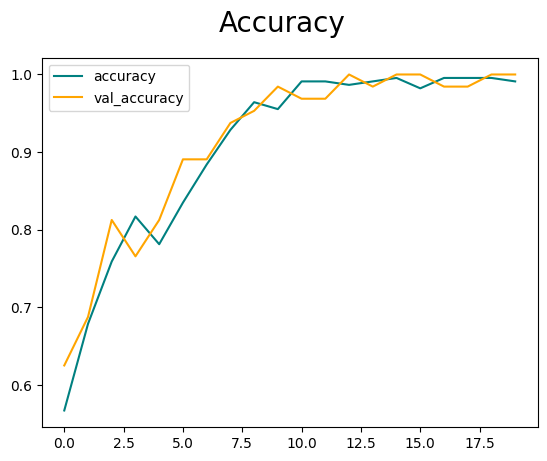

In [54]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [55]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [56]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [57]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


2024-10-09 10:08:33.440612: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [58]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [59]:
import cv2

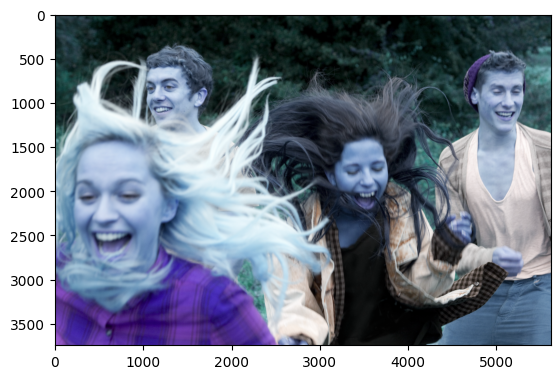

In [60]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

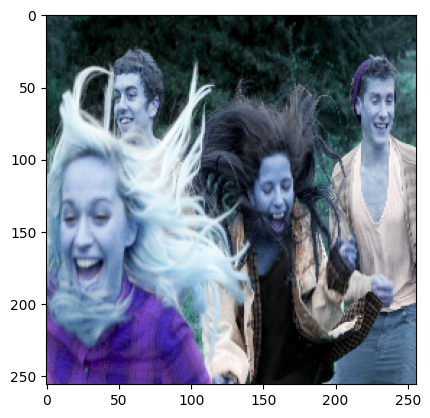

In [61]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [62]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [63]:
yhat

array([[4.279278e-06]], dtype=float32)

In [64]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [72]:
from tensorflow.keras.models import load_model

In [74]:
model.save(os.path.join('models','imageclassifiernew.keras'))

In [75]:
new_model = load_model('imageclassifiernew.keras')

ValueError: File not found: filepath=imageclassifiernew.keras. Please ensure the file is an accessible `.keras` zip file.

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)